In [98]:
import cv2, os, glob
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, threshold_yen
from skimage.filters import threshold_otsu, threshold_yen, try_all_threshold, threshold_minimum, threshold_isodata
import skimage.measure as measure
from scipy.stats import linregress
from scipy.optimize import curve_fit

# Splitting videos into images

In [106]:
#Step 1: split into images

#find videos
print(f'Current directory: {os.getcwd()}') #troubleshooting, find current directory

path_to_videos = glob.glob(os.path.join('Videos','*.avi')) #issue may be encountered where the video type is .mp4 instead of .avi
print(path_to_videos, '-'*10, sep = '\n') #troubleshooting step, to ensure video paths are extracted correctly

#create required directories
def makefolders(path):
    folder = os.path.split(path) #create folders for extracting all images
    folder = os.path.splitext(folder[-1])
    folder_create = os.path.join('Videos',folder[0])
    if os.path.exists(folder_create) == False: #checking if the folder already exists, and if it does not, create a new folder with the video name as its name
        os.mkdir(folder_create)
    else:
        pass
    return folder_create

#navigate into folder for the image and save images
def saveimages(path, dir_name):
    cam = cv2.VideoCapture(path) #access the video. Idk how this actually works
    video_index = []
    count, success = 0, True
    while success:
        success, image = cam.read() #access next image of the video
        if not cam.isOpened():
            print(f"Error: Could not open video file {path}")
        os.chdir(dir_name) #change directory so that it saves into the directory that we want to save into
        if success:
            folder = os.path.split(dir_name)
            frame = f'{folder[-1]}_frame_{count:02}.jpg'
            video_index.append(frame)
            if os.path.exists(frame) == False:
                cv2.imwrite(frame, image)
                count+=1
            else:
                print(f'Image {folder[-1]}_frame_{count:02}.jpg already exists, skipping save')
                count+=1
        else:
            print('Image failed to save')
        os.chdir(os.path.join('..','..')) #exit directory for that particular video folder
    cam.release()
    print(f'Current directory: {os.getcwd()} \n Completed {path}\n--------------------')
    return video_index

Current directory: C:\Users\austi\Documents\learning-portfolio-2024-aug-immunoglobulinaustin\final_group_project
['Videos\\0.5ugDNA_drug10uM_5min45min_1.avi', 'Videos\\0.75ugDNA_drug10uM_5min45min_1.avi', 'Videos\\1ugDNA_drug10uM_5min45min_1.avi', 'Videos\\LipoKDEL1ug_biotin_drug25uM_live_5min1h.avi', 'Videos\\LipoKDEL1ug_biotin_no drug_live_5min1h.avi', 'Videos\\XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h.avi', 'Videos\\XtremeStr-li1.5ug_biotin_no drug_live_5min45min.avi']
----------


In [135]:
#this extracts images by calling the functions defined above
video_indexes, folder_indexes = [],[]
vf_dict = {}
for path in path_to_videos:
    dir_name = makefolders(path)
    folder_indexes.append(dir_name)
    img_names = saveimages(path, dir_name)
    video_indexes.append(img_names)
    vf_dict[os.path.split(dir_name)[-1]] = img_names #add new terms to dictionary

Image 0.5ugDNA_drug10uM_5min45min_1_frame_00.jpg already exists, skipping save
Image 0.5ugDNA_drug10uM_5min45min_1_frame_01.jpg already exists, skipping save
Image 0.5ugDNA_drug10uM_5min45min_1_frame_02.jpg already exists, skipping save
Image 0.5ugDNA_drug10uM_5min45min_1_frame_03.jpg already exists, skipping save
Image 0.5ugDNA_drug10uM_5min45min_1_frame_04.jpg already exists, skipping save
Image 0.5ugDNA_drug10uM_5min45min_1_frame_05.jpg already exists, skipping save
Image 0.5ugDNA_drug10uM_5min45min_1_frame_06.jpg already exists, skipping save
Image 0.5ugDNA_drug10uM_5min45min_1_frame_07.jpg already exists, skipping save
Image 0.5ugDNA_drug10uM_5min45min_1_frame_08.jpg already exists, skipping save
Image 0.5ugDNA_drug10uM_5min45min_1_frame_09.jpg already exists, skipping save
Image failed to save
Current directory: C:\Users\austi\Documents\learning-portfolio-2024-aug-immunoglobulinaustin\final_group_project 
 Completed Videos\0.5ugDNA_drug10uM_5min45min_1.avi
--------------------
Im

# Old code

In [ ]:
cwd = os.getcwd() #getting current working directory

temp = glob.glob(os.path.join(cwd, 'Videos', '*')) #in my current working directory, access videos folder and list me all the files inside
video_folders = [file for file in temp if not file.endswith(".avi")] #using list comprehension. access the files inside temp, isolate the files with '.avi', and exclude it. store as video_folders

all_video_values = [] #empty list to add the arrays generated for all 7 videos into 1 list, for downstream works.

def extract_fluorescenceData(folder_path): #creating a function called extract_fluorescenceData, to loop through the 7 different folders.
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd, 'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img)
            if img.lower().endswith(('.jpg')): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                total_fluorescence.append(img_gray.sum()) #sum up signal inside individual frames and append into total_fluorascence

    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence #return here so can use in "histogrammer" function. this variable will be 'video1' in histogrammer function


def histogrammer(video1, i): #video1 is an array of the max fluorescence values, i simply stands for index
    video1_normalise = video1/max(video1) #normalising to highest sum fluorescent signal in the frames. 
    name = os.path.split(video_folders[i]) #split it by \\ into index, where [0] = your directory and [i] in this case is folder names
    x = range(1, len(video1)+1) #plotting frame 1 to n+1
    
    #plotting segment
    plt.figure(figsize = (13, 6)) #setting the figure size, has to be before plt.plot
    plt.plot(x, video1_normalise, linestyle = 'dashed', marker = 'o') #marker is the data point, marked as circle.
    
    #Labels & aesthetics
    plt.xticks(x) #this makes it show every tick in X axis
    plt.xlabel('Frame number', fontsize = 10)
    plt.ylabel('Total fluorescence signal', fontsize = 10)
    plt.grid(alpha = .25)
    plt.title(name[1], fontsize = 10) #name[1] as my first index will be my path, second index is filename
    plt.tight_layout()
    # plt.savefig(f'Graph for {name[1]}.jpg', dpi = 300) #added saving of plots!
    plt.show() #visualisation purposes only, for the output
    

#calling of the functions to do all the dirty work
for i, folder in enumerate(video_folders): #for index inside folder, count the number of folders inside the path video_folders
    video1 = extract_fluorescenceData(folder) #isolate the single videos, split into frames, change to grayscale, give add sum(fluorescence) per frame and save as video1
    all_video_values.append(video1) #append numpy total_fluorescence of this video from each iteration into all_video_values. Placed here instead of extract_fluorescenceData function if not next time i call it, it will append junk
    histogrammer(video1, i) #store the list of fluorescence signals as video1 and plot histogram

# Crop and Plot

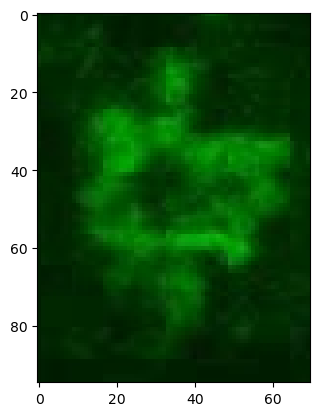

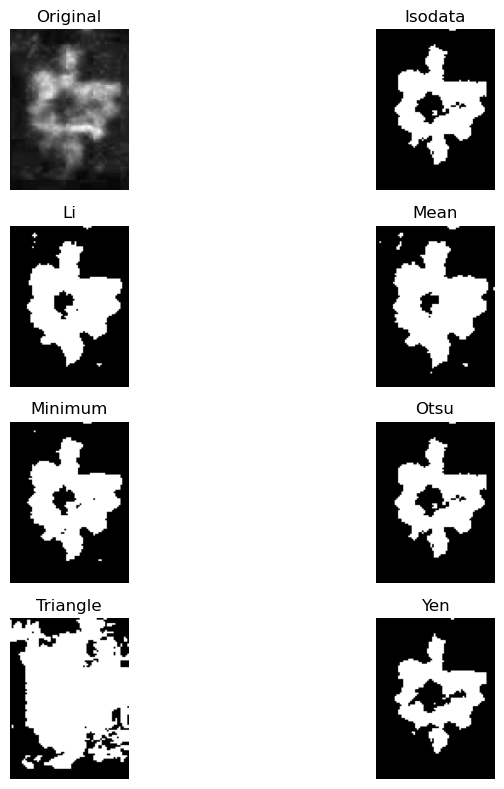

In [5]:
#here, testing on a single image for cropping
video = {'1ugDNA_drug10uM_5min45min_1': (625,740, 600,720)}

img_path = '1ugDNA_drug10uM_5min45min_1_frame_01.jpg'
img = plt.imread(os.path.join('Videos',list(video.keys())[0], img_path))
img = img[695:790, 655:725]

plt.imshow(img)

img_grey = rgb2gray(img)
plt.show()

fig, ax = try_all_threshold(img_grey, figsize=(10, 8), verbose=False)
plt.show()

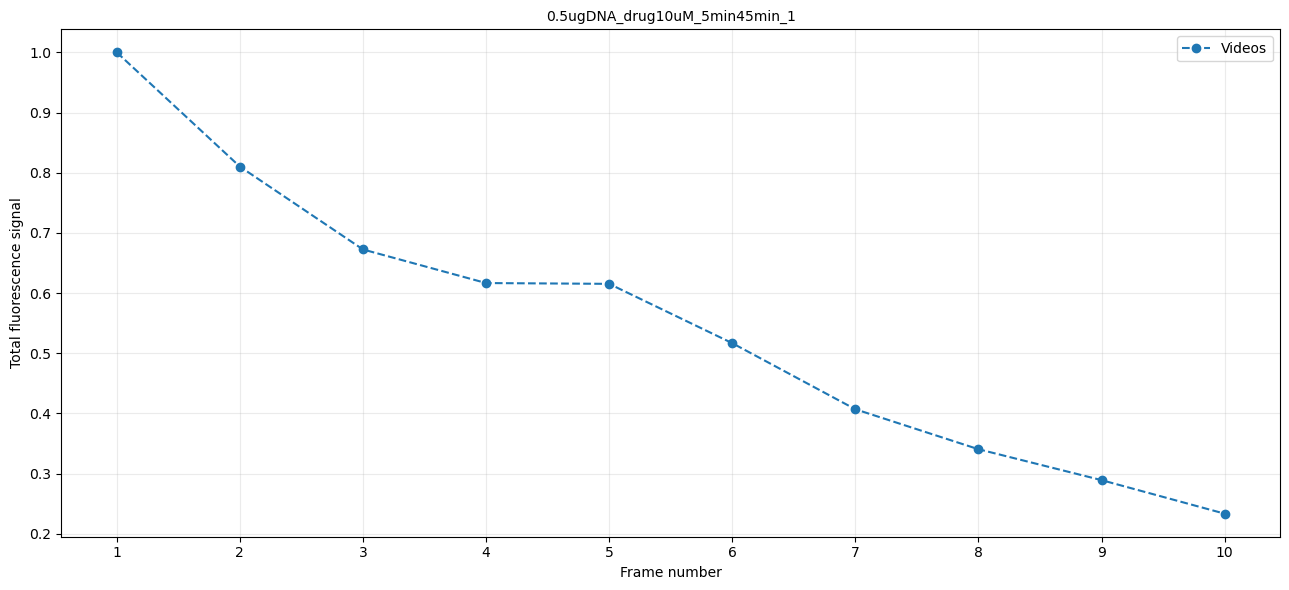

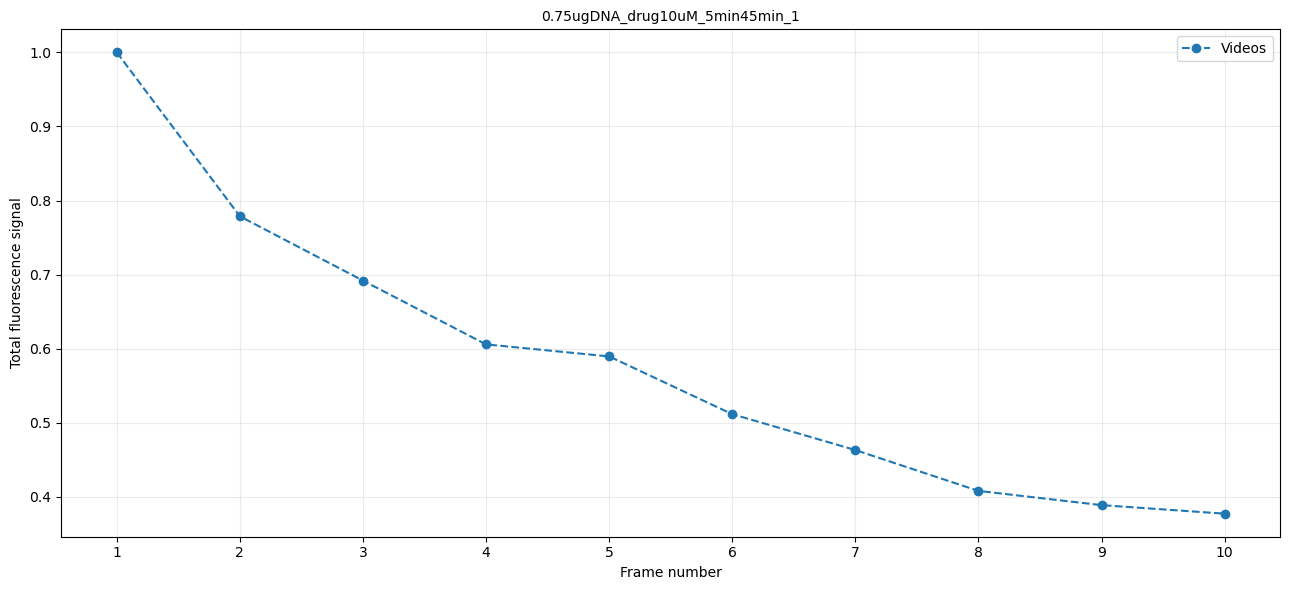

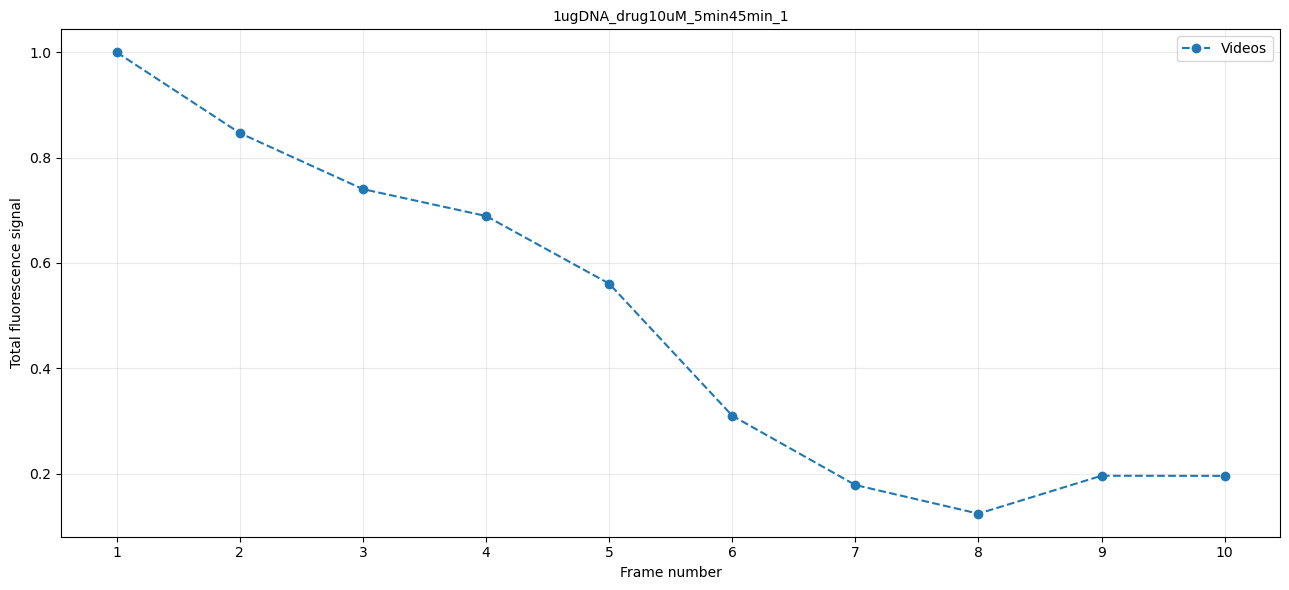

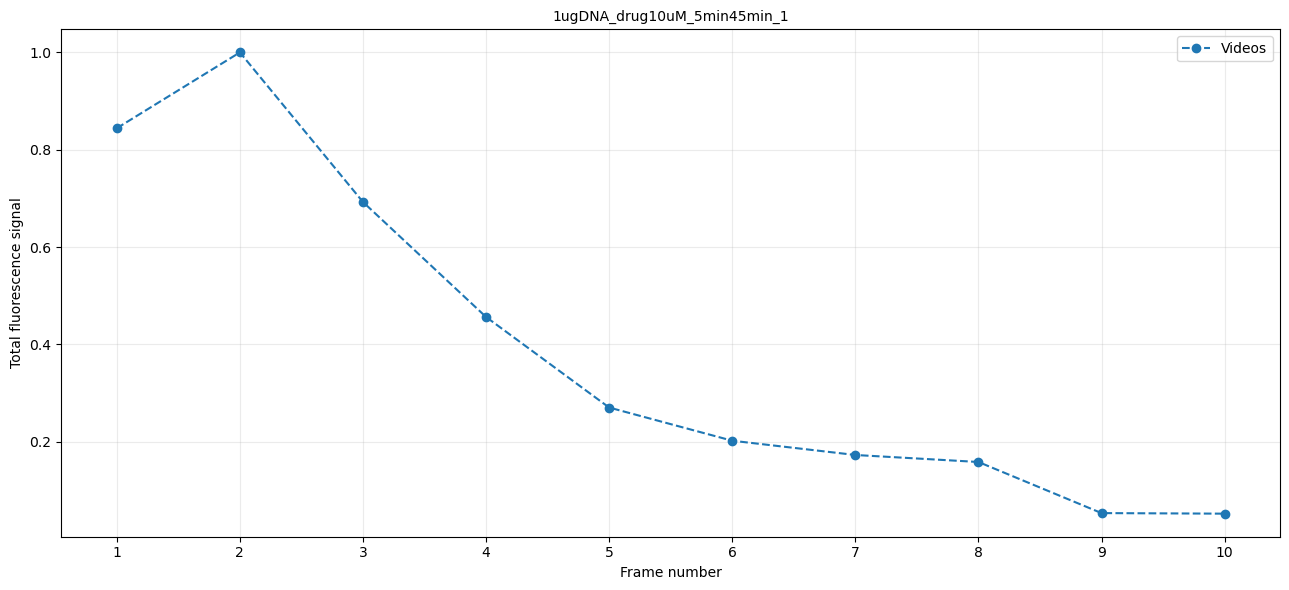

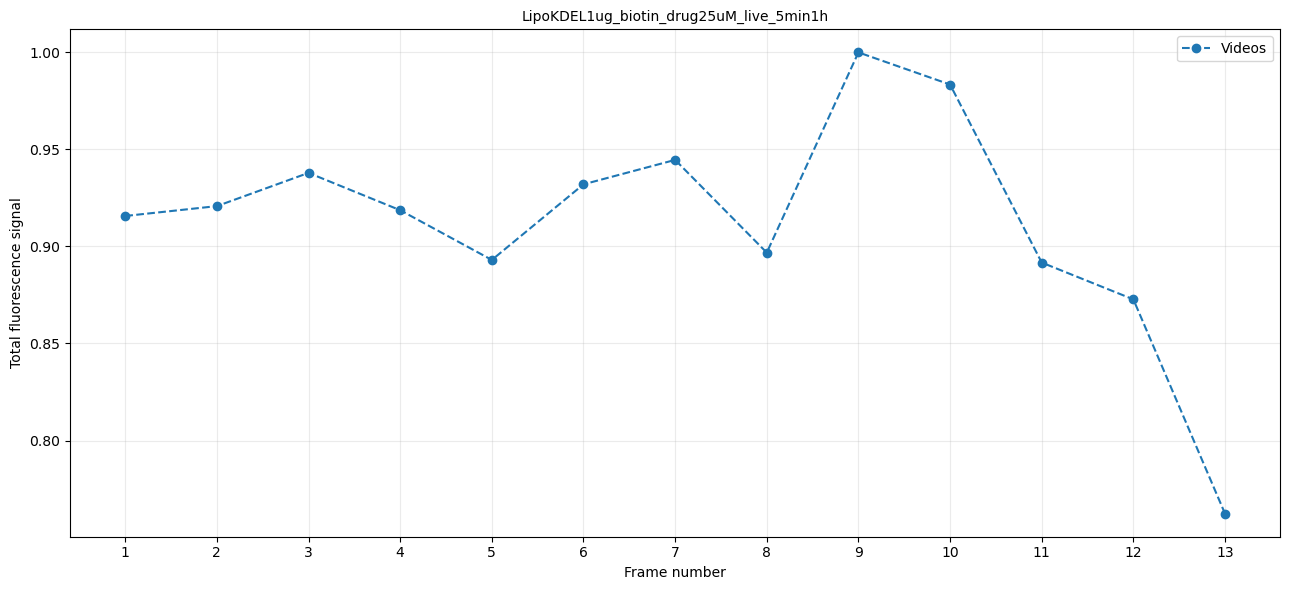

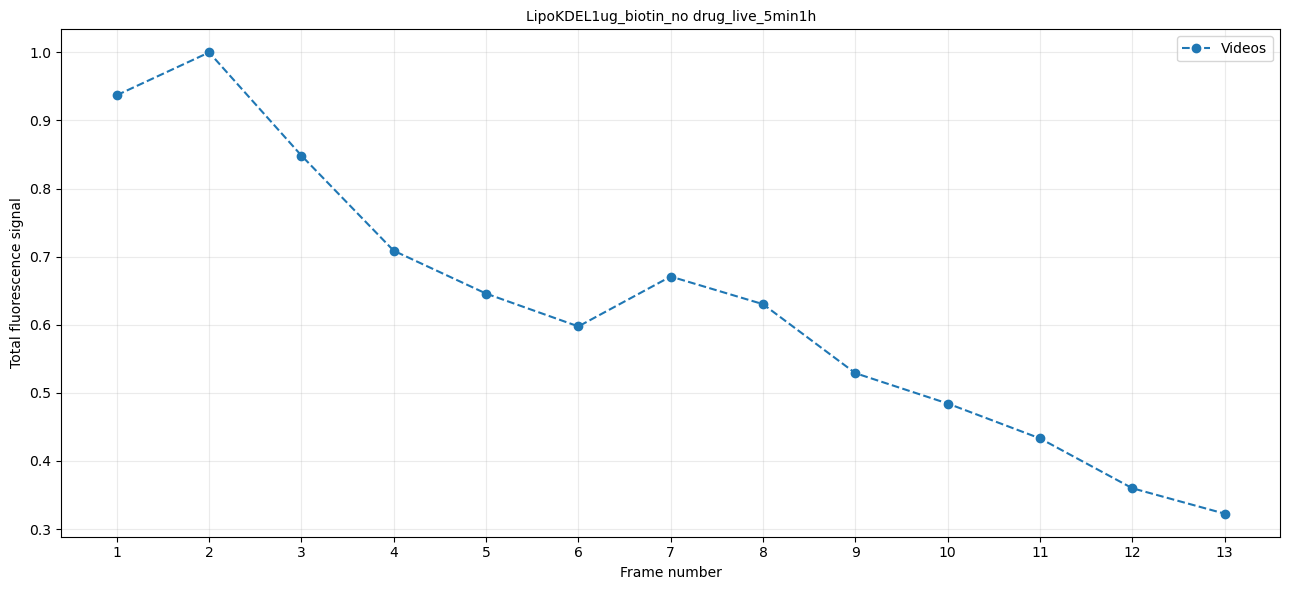

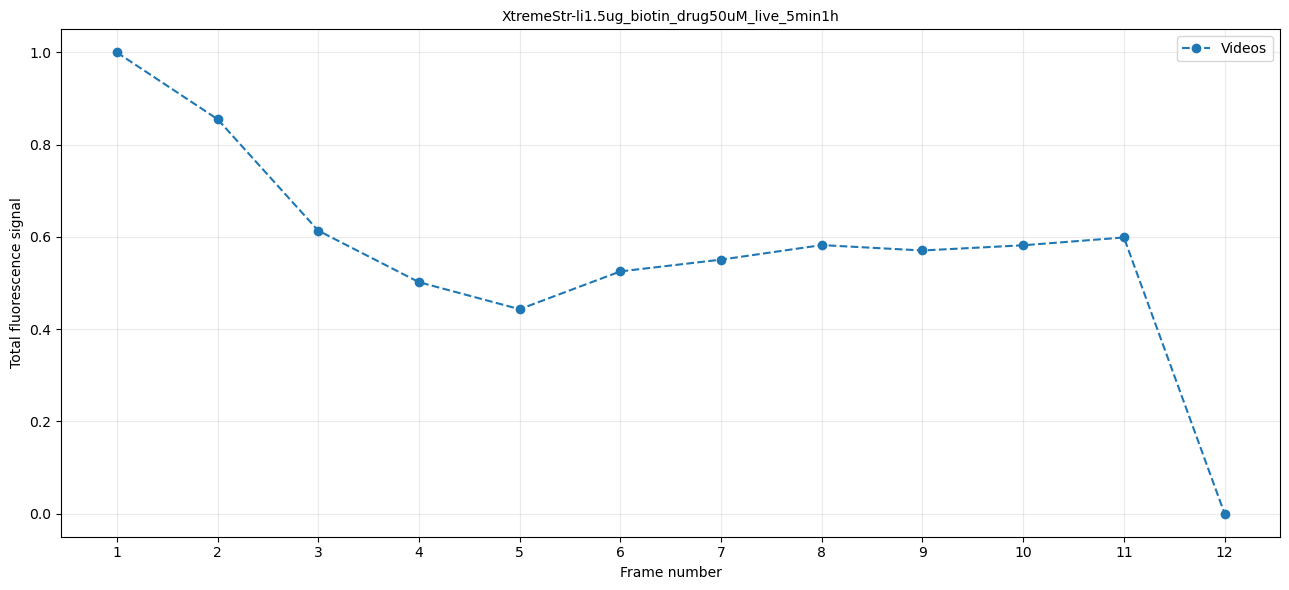

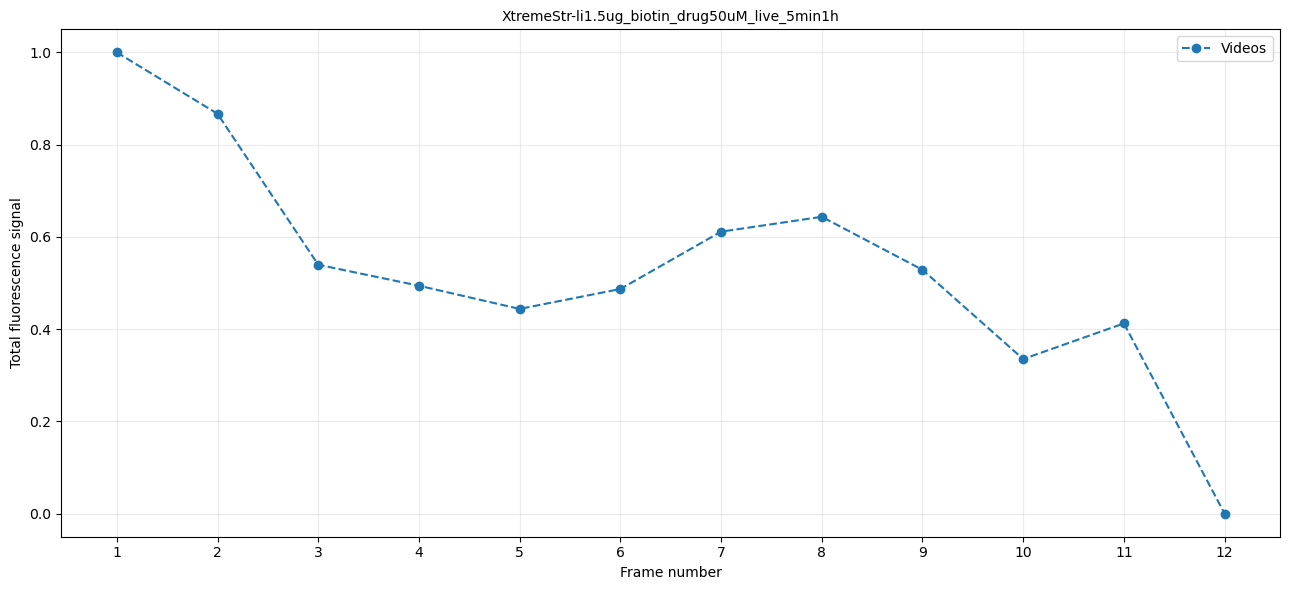

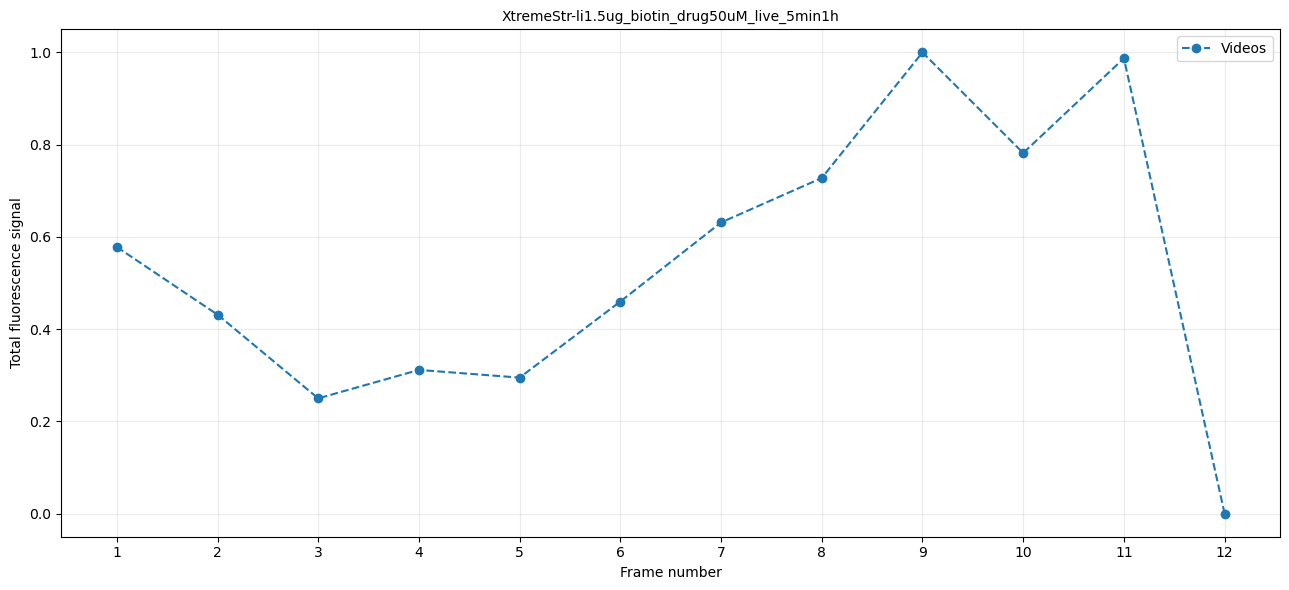

In [132]:
# This works, for our new approach.
cwd = os.getcwd() #getting current working directory

temp = glob.glob(os.path.join(cwd, 'Videos', '*')) #in my current working directory, access videos folder and list me all the files inside
video_folders = [file for file in temp if not file.endswith(".avi")] #using list comprehension. access the files inside temp, isolate the files with '.avi', and exclude it. store as video_folders

folders_to_process = ('LipoKDEL1ug_biotin_no drug_live_5min1h',  'LipoKDEL1ug_biotin_drug25uM_live_5min1h', 'XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h',
                       '0.5ugDNA_drug10uM_5min45min_1', '0.75ugDNA_drug10uM_5min45min_1', '1ugDNA_drug10uM_5min45min_1')

testing = {'Videos\\0.5ugDNA_drug10uM_5min45min_1': [(300,500, 400,600)],
           'Videos\\0.75ugDNA_drug10uM_5min45min_1': [(300,475, 375,550)],
           'Videos\\1ugDNA_drug10uM_5min45min_1': [(400,550, 180,300), (695,790, 655,725)],
           'Videos\\LipoKDEL1ug_biotin_drug25uM_live_5min1h': [(25,740, 600,720)],
           'Videos\\LipoKDEL1ug_biotin_no drug_live_5min1h': [(550,690, 450,600)],
           'Videos\\XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h': [(85,400, 70,150), (615,675, 650,715), (170,260, 970,1024)]
}
         #   'Videos\\XtremeStr-li1.5ug_biotin_no drug_live_5min45min': []
         # }

all_video_values = [] #empty list to add the arrays generated for all 7 videos into 1 list, for downstream works.

def extract_fluorescenceData(folder_path, resolutions): #creating a function called extract_fluorescenceData, to loop through the 7 different folders.
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd, folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img)
            if img.lower().endswith('.jpg'): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_grey = rgb2gray(a) #converting the img into grayscale
                y1, y2, x1, x2 = resolutions
                cropped_img = img_grey[y1:y2, x1:x2]
                total_fluorescence.append(cropped_img.sum()) #sum up signal inside individual frames and append into total_fluorascence

    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence #return here so can use in "histogrammer" function. this variable will be 'video1' in histogrammer function


def histogrammer(video1, n): #video1 is an array of the max fluorescence values, i simply stands for index
    video1_normalise = video1/max(video1) #normalising to highest sum fluorescent signal in the frames.
    name = os.path.split(n) #split it by \\ into index, where [0] = your directory and [i] in this case is folder names
    x = range(1, len(video1)+1) #plotting frame 1 to n+1

    #plotting segment
    plt.figure(figsize = (13, 6)) #setting the figure size, has to be before plt.plot
    plt.plot(x, video1_normalise, linestyle = 'dashed', marker = 'o') #marker is the data point, marked as circle.

    #Labels & aesthetics
    plt.xticks(x) #this makes it show every tick in X axis
    plt.xlabel('Frame number', fontsize = 10)
    plt.ylabel('Total fluorescence signal', fontsize = 10)
    plt.grid(alpha = .25)
    plt.title(name[1], fontsize = 10) #name[1] as my first index will be my path, second index is filename
    plt.legend(name)
    plt.tight_layout()
    # plt.savefig(f'Graph for {name[1]}.jpg', dpi = 300) #added saving of plots!
    plt.show() #visualisation purposes only, for the output

for key in testing.keys():
    for i in range(len(testing[key])):
        video1 = extract_fluorescenceData(key, testing[key][i])
        histogrammer(video1, key)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


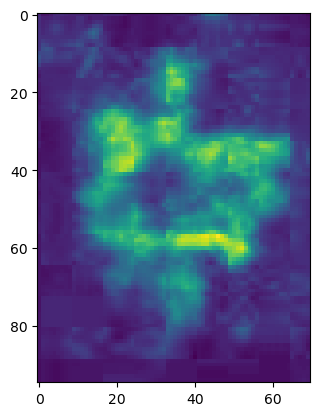

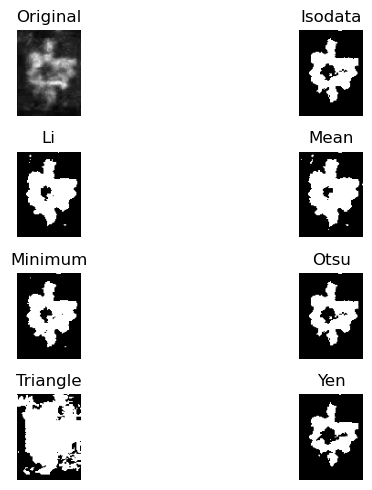

In [108]:
plt.imshow(img_grey)
threshold_all = try_all_threshold(img_grey)

4786.0
---------- Region 0 ----------
Centre	: (48.02611784371082, 33.898035938152944)
Area	: 4786.0


---------- Region 1 ----------
Centre	: (45.727598566308245, 33.473118279569896)
Area	: 279.0




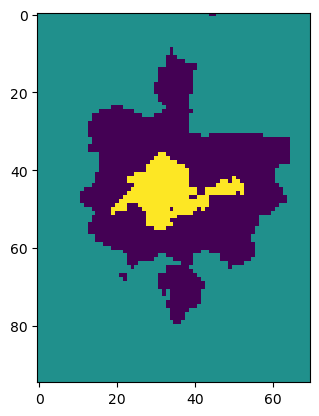

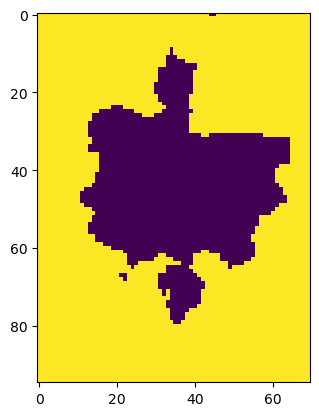

In [38]:
#testing the threshold_minimum chosen for one image
threshold = threshold_yen(img_grey)
img_binarised = img_grey < threshold
# plt.imshow(img_binarised)

img_labelled = measure.label(img_binarised.astype('uint8'))
plt.imshow(img_labelled)

region_info = measure.regionprops(img_labelled)
print(region_info[0].area) # tells you the pixels in a single region

no_of_regions = len(region_info) #only 2 regions present

for count, region in enumerate(region_info):
    print('-'*10, f'Region {count}', '-'*10)
    print(f'Centre\t: {region.centroid}')
    print(f'Area\t: {region.area}')
    print('\n')
plt.show()

img_masked = img_labelled == 1
plt.imshow(img_masked)
plt.show()

0.37313437270220584
0.1736187691482843
0.12620330882352943
0.1132411328125
0.13550118183210785
0.19348363281250003
0.2699493098958333
0.2714990211397059
0.2636954840686274
0.22235941406250004


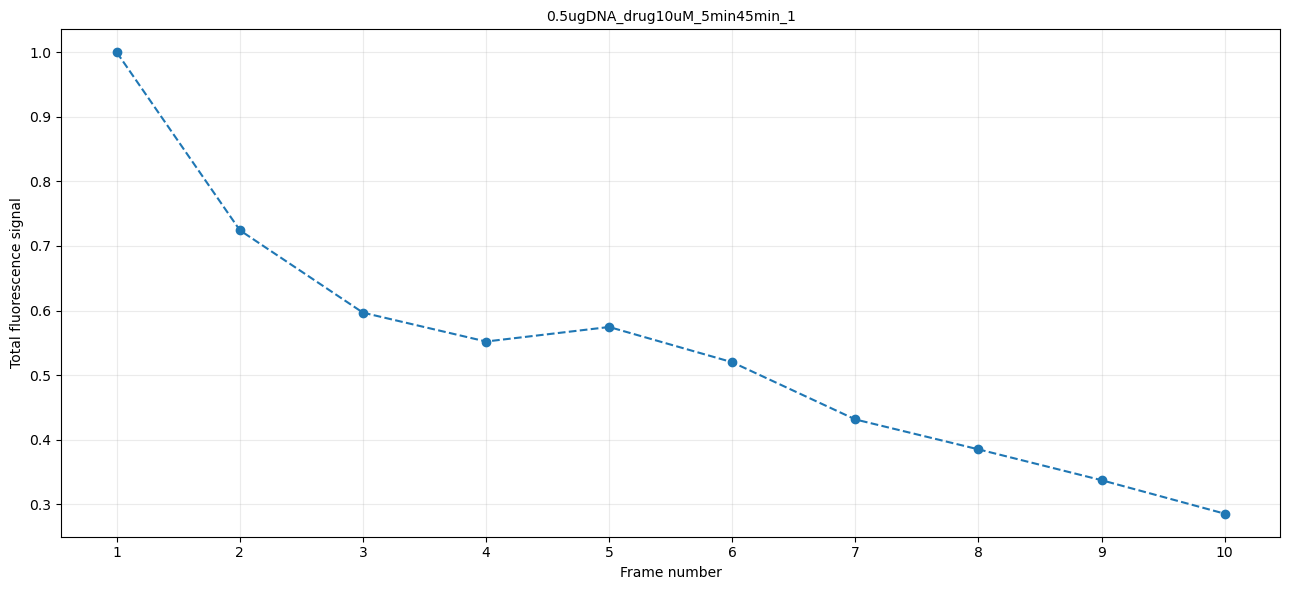

0.3252779381127452
0.18629681219362743
0.1707851631433824
0.24884634191176475
0.3605380935968137
0.4067746744791667
0.3752348299632354
0.3467698835784314
0.35502610753676467
0.3399278385416667


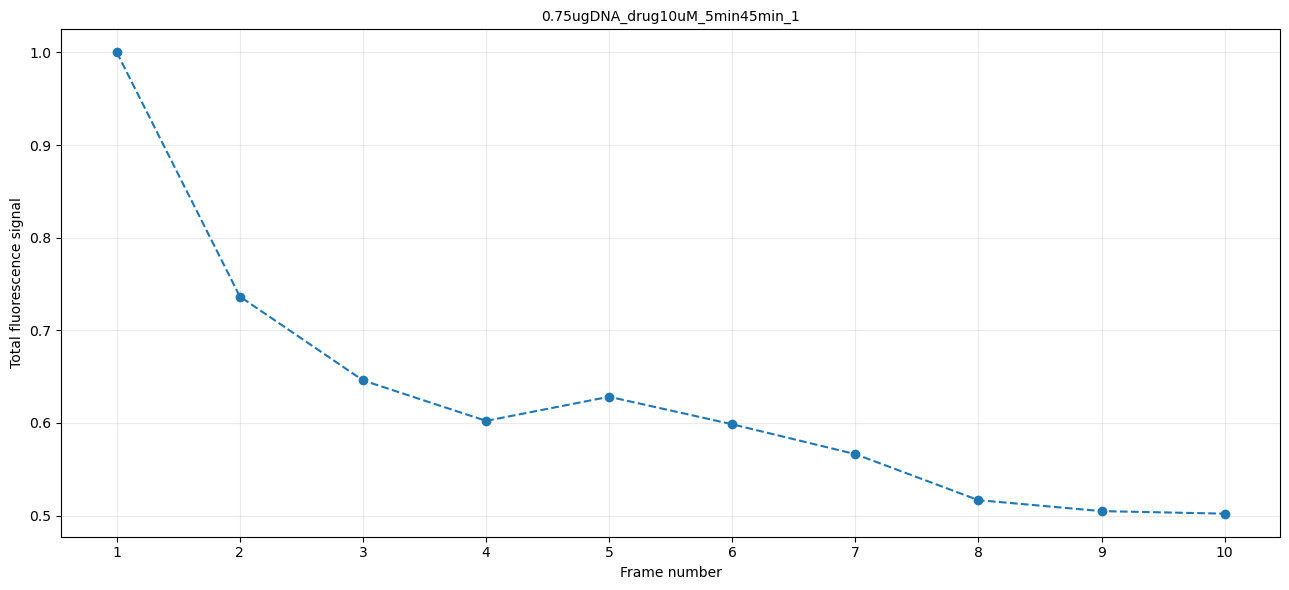

0.3090274662990196
0.23144620251225495
0.19360748544730394
0.18742311887254903
0.25219486443014705
0.2496700413602942
0.15214110064338238
0.06738214920343139


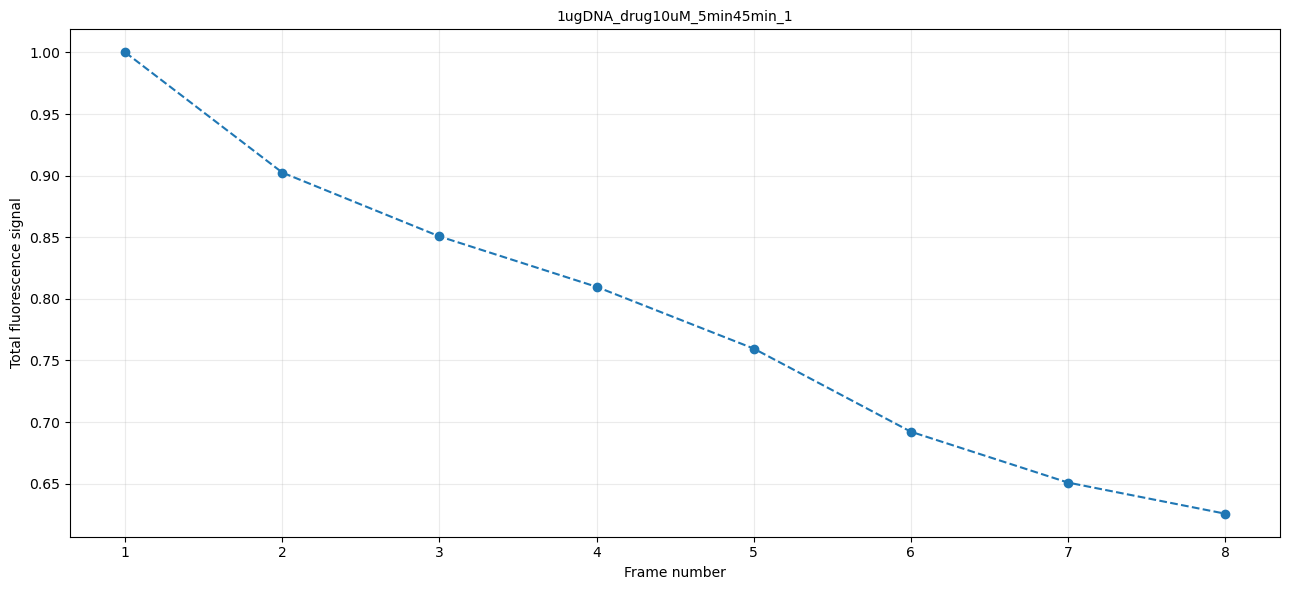

0.250281731004902
0.23540550398284313
0.21343884650735295
0.12062228630514706
0.05904760952818627
0.040973462009803924
0.03759415364583333
0.02326929074754902


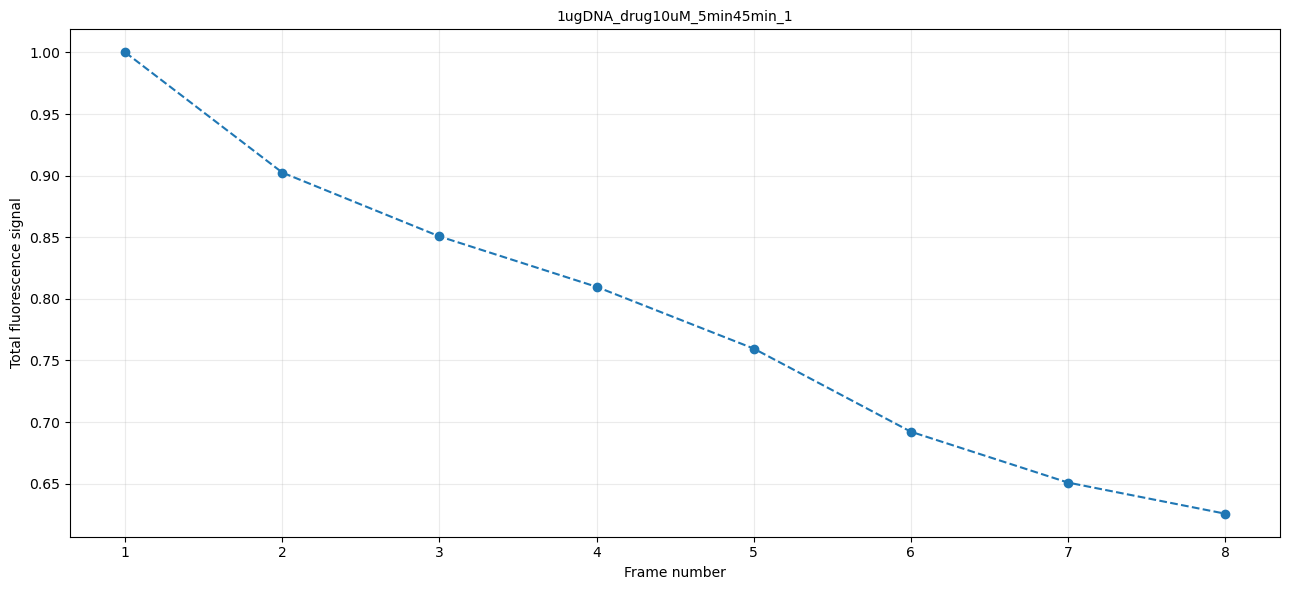

0.34402765625
0.26703537147671574
0.20975510263480396
0.20203223651960783
0.21008913602941176
0.18459635416666667
0.18887485523897063
0.1800542524509804
0.19500812346813726
0.2470112377450981
0.283331881127451
0.286196619944853
0.3044032889093137


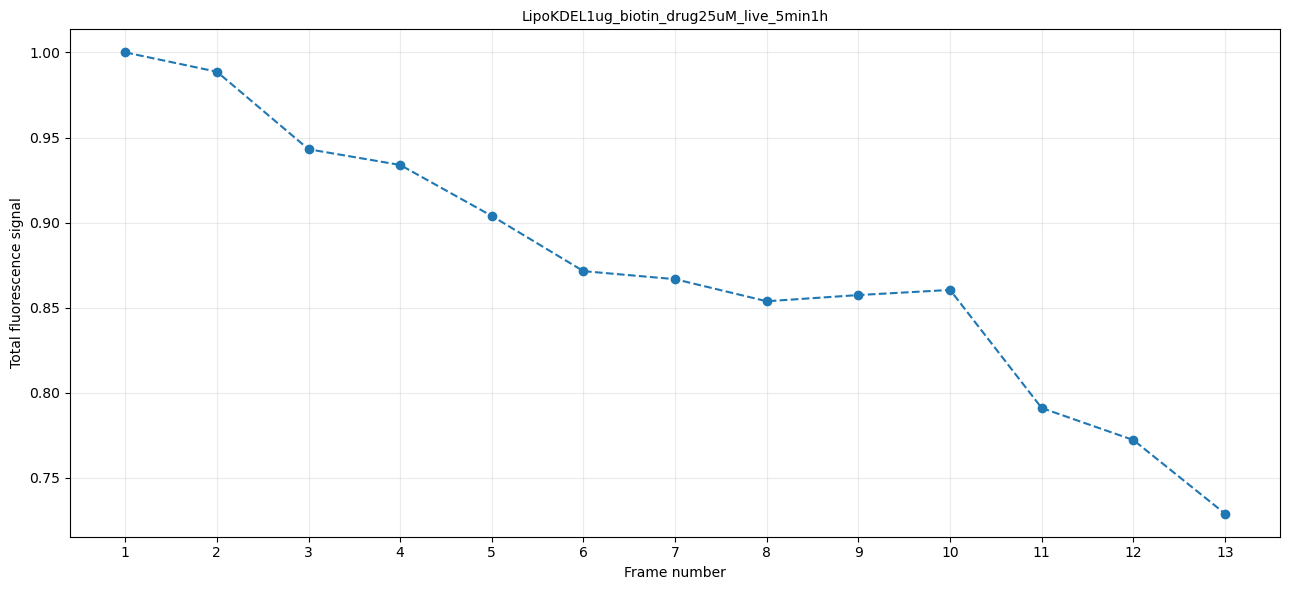

0.3219368412990196
0.338314672947304
0.2418088694852942
0.15604056755514706
0.13606528262867648
0.12529954427083334
0.11177475873161766
0.16126318014705882
0.20531089307598038
0.20110380744485296
0.28590545419730395
0.20630236060049018
0.22030078125000002


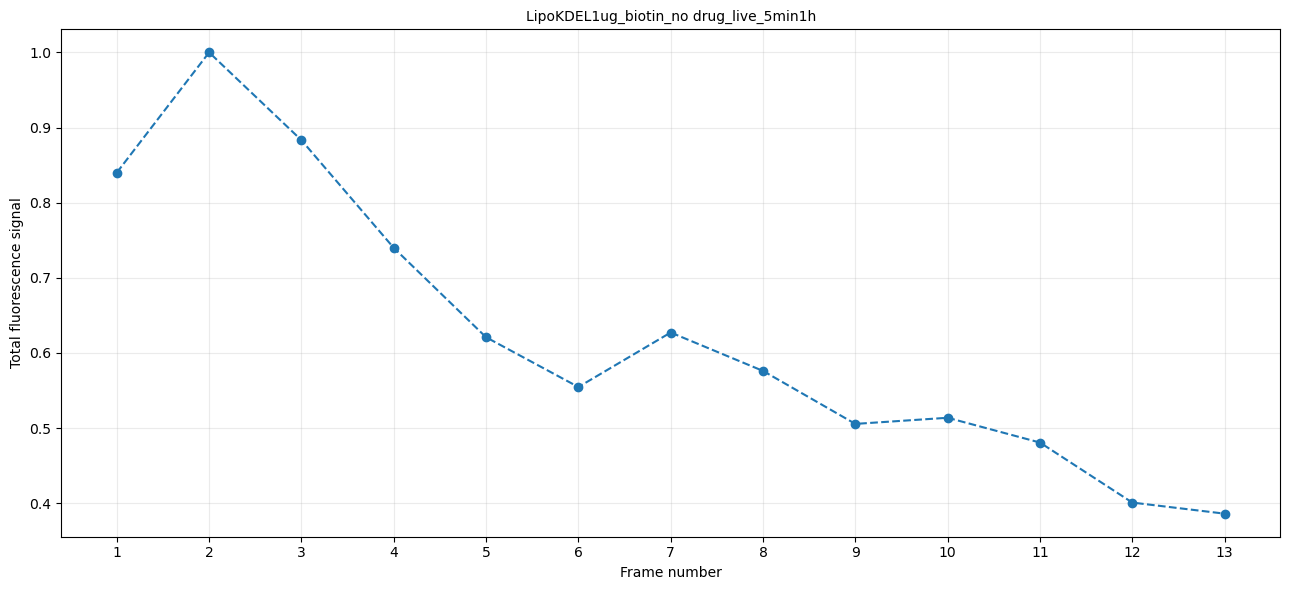

0.2962763327205883
0.24895145909926475
0.17282977941176475
0.1563807559742647
0.15004487591911764
0.14610401194852943
0.12288499080882354
0.1707094669117647
0.17066790900735296
0.2205138365502451
0.21829241038602942


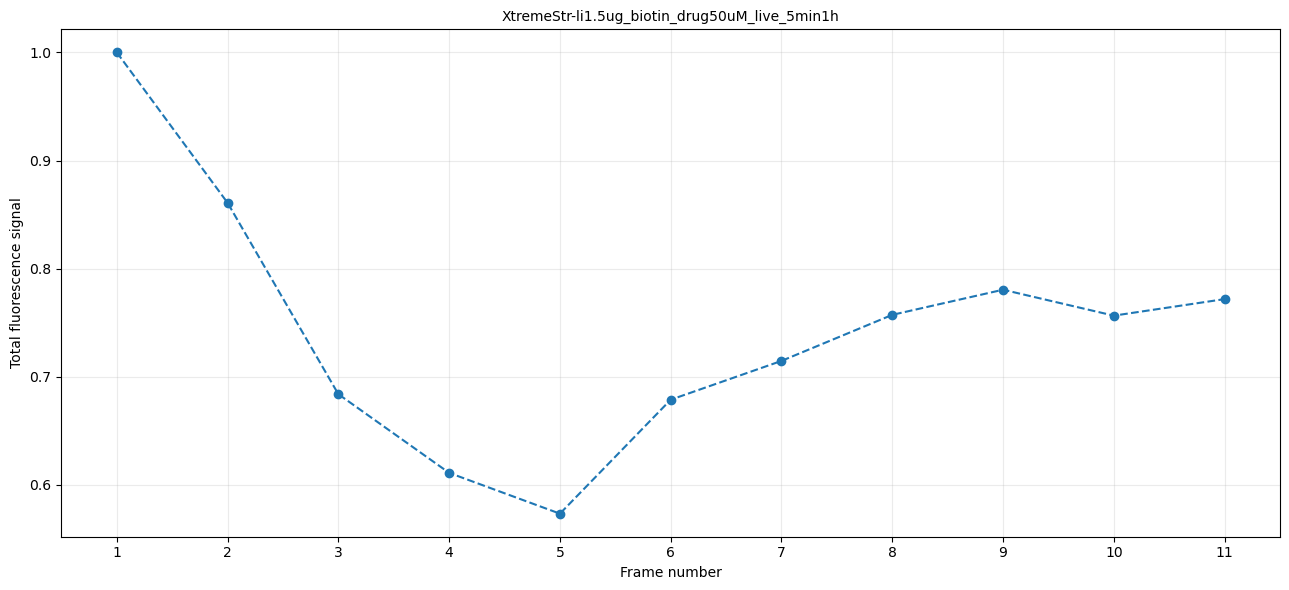

0.35046065946691185
0.34147938112745096
0.2513800742953431
0.20433915594362748
0.21501857383578432
0.2220154633884804
0.21843578814338235
0.28443776194852943
0.33216529641544124
0.1895305598958333
0.24304278722426473


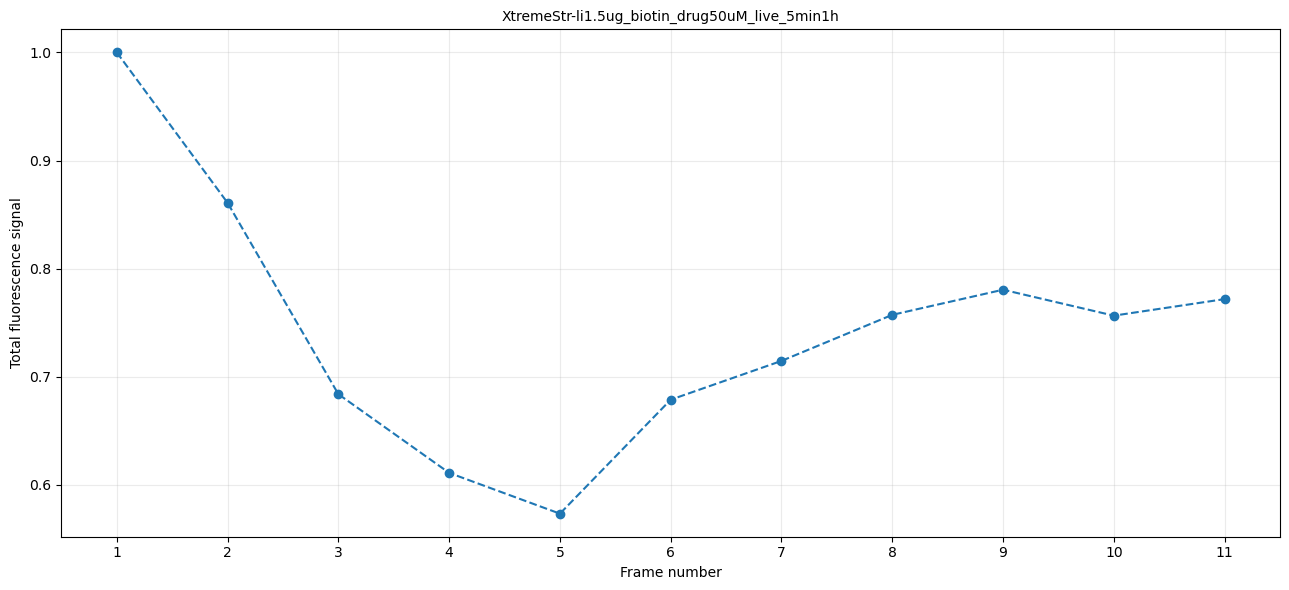

0.16261886106004902
0.17026985983455883
0.08252740349264705
0.10414497702205883
0.10461000689338237
0.16521847273284315
0.19706445542279413
0.19058199142156862
0.2835388189338236
0.2046450168504902
0.268852734375


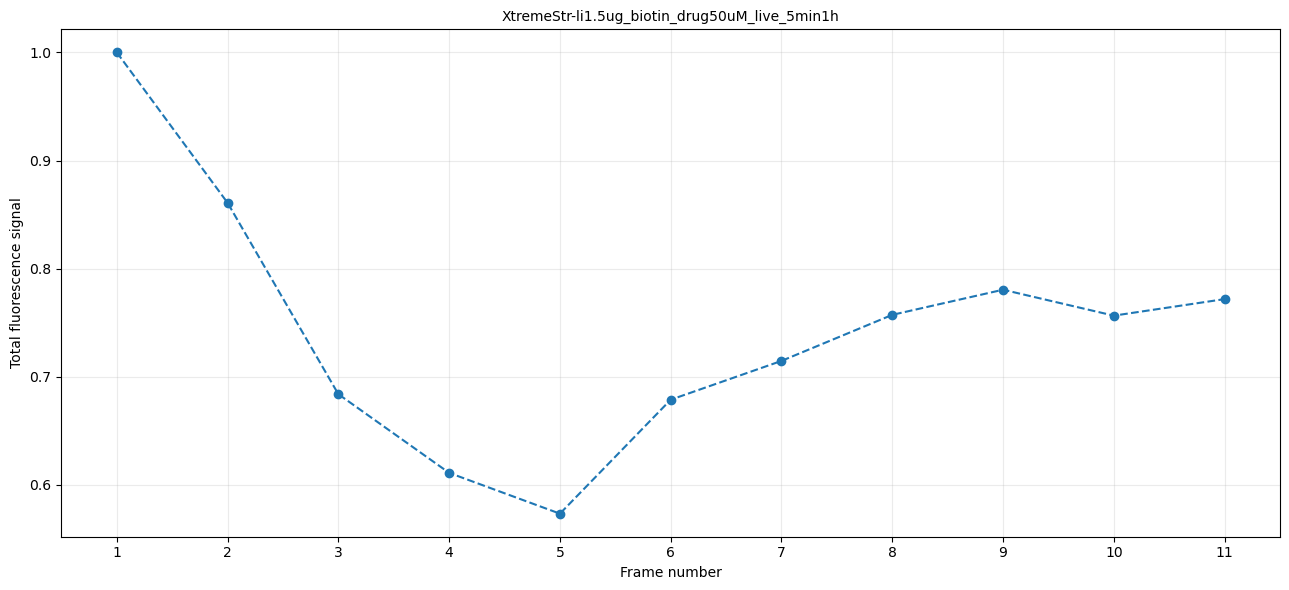

In [125]:
# This works, for our new approach.
cwd = os.getcwd() #getting current working directory

temp = glob.glob(os.path.join(cwd, 'Videos', '*')) #in my current working directory, access videos folder and list me all the files inside
video_folders = [file for file in temp if not file.endswith(".avi")] #using list comprehension. access the files inside temp, isolate the files with '.avi', and exclude it. store as video_folders

folders_to_process = ('LipoKDEL1ug_biotin_no drug_live_5min1h',  'LipoKDEL1ug_biotin_drug25uM_live_5min1h', 'XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h',
                       '0.5ugDNA_drug10uM_5min45min_1', '0.75ugDNA_drug10uM_5min45min_1', '1ugDNA_drug10uM_5min45min_1')

testing = {'Videos\\0.5ugDNA_drug10uM_5min45min_1': [(300,500, 400,600)],
           'Videos\\0.75ugDNA_drug10uM_5min45min_1': [(300,475, 375,550)],
           'Videos\\1ugDNA_drug10uM_5min45min_1': [(400,550, 180,300), (695,790, 655,725)],
           'Videos\\LipoKDEL1ug_biotin_drug25uM_live_5min1h': [(625,740, 600,720)],
           'Videos\\LipoKDEL1ug_biotin_no drug_live_5min1h': [(550,690, 450,600)],
           'Videos\\XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h': [(285,400, 70,150), (615,675, 650,715), (170,260, 970,1024)]
}
         #   'Videos\\XtremeStr-li1.5ug_biotin_no drug_live_5min45min': []
         # }

all_video_values = [] #empty list to add the arrays generated for all 7 videos into 1 list, for downstream works.

# def noise_removal(folder_path, resolutions):
#     subdir_path = os.path.join(cwd, folder_path) #create path to directory in the iteration
#     if os.path.isdir(subdir_path): #checking if subdirectory path exist
#         for img in os.listdir(subdir_path):
#             img_path = os.path.join(subdir_path, img)
#             if img.lower().endswith('.jpg'): #filter for only .jpg files inside subdir_path
#                 a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
#                 img_grey = rgb2gray(a) #converting the img into grayscale
#                 y1, y2, x1, x2 = resolutions
#                 cropped_img = img_grey[y1:y2, x1:x2]
#                 # total_fluorescence.append(cropped_img.sum()) #sum up signal inside individual frames and append into total_fluorascence
#                 threshold = threshold_yen(cropped_img)
#                 img_binarised = cropped_img < threshold
#                 # img_labelled = measure.label(img_binarised.astype('uint8'))
#                 # plt.imshow(img_labelled)
#                 # region_info = measure.regionprops(img_labelled)
#                 # img_masked = img_labelled == 1
#                 # plt.imshow(img_binarised)
#                 # plt.show()
#             return img_binarised

def extract_fluorescenceData(folder_path, resolutions): #creating a function called extract_fluorescenceData, to loop through the 7 different folders.
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd, folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img)
            if img.lower().endswith('.jpg'): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_grey = rgb2gray(a) #converting the img into grayscale
                y1, y2, x1, x2 = resolutions
                cropped_img = img_grey[y1:y2, x1:x2]
                # threshold = threshold_minimum(cropped_img)
                threshold = threshold_yen(cropped_img)
                print(threshold)
                img_binarised = cropped_img < threshold #still working on this.....
                total_fluorescence.append(img_binarised.sum()) #sum up signal inside individual frames and append into total_fluorascence

    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence #return here so can use in "histogrammer" function. this variable will be 'video1' in histogrammer function


def histogrammer(video1, n): #video1 is an array of the max fluorescence values, i simply stands for index
    video1_normalise = video1/max(video1) #normalising to highest sum fluorescent signal in the frames.
    name = os.path.split(n) #split it by \\ into index, where [0] = your directory and [i] in this case is folder names
    x = range(1, len(video1)+1) #plotting frame 1 to n+1

    #plotting segment
    plt.figure(figsize = (13, 6)) #setting the figure size, has to be before plt.plot
    plt.plot(x, video1_normalise, linestyle = 'dashed', marker = 'o') #marker is the data point, marked as circle.

    #Labels & aesthetics
    plt.xticks(x) #this makes it show every tick in X axis
    plt.xlabel('Frame number', fontsize = 10)
    plt.ylabel('Total fluorescence signal', fontsize = 10)
    plt.grid(alpha = .25)
    plt.title(name[1], fontsize = 10) #name[1] as my first index will be my path, second index is filename
    plt.tight_layout()
    # plt.savefig(f'Graph for {name[1]}.jpg', dpi = 300) #added saving of plots!
    plt.show() #visualisation purposes only, for the output


for key in testing.keys():
    for i in range(len(testing[key])):
        # noise_removal(key, testing[key][i])
        video1 = extract_fluorescenceData(key, testing[key][i])
        histogrammer(video1, key)

In [160]:
def ratio_Data(folder_path, img_order, resolutions):
    total_fluorescence, areas = [], []
    subdir_path = os.path.join(cwd,'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in img_order:
            img_path = os.path.join(subdir_path, img)
            if os.path.exists(img_path):
                a=plt.imread(img_path)
                img_gray = rgb2gray(a)
                y1, y2, x1, x2 = resolutions
                cropped_img = img_gray[y1:y2, x1:x2]

                try:
                    threshold = threshold_minimum(cropped_img)
                    binarised_img = cropped_img < threshold
                    img_labelled = measure.label(binarised_img.astype('uint8'))
                    region_info = measure.regionprops(img_labelled)
                # plt.imshow(binarised_img, cmap = 'gray')
                # plt.show()

                    total_fluorescence.append(cropped_img.sum()) #sum up signal inside individual frames and append into total_fluorascence
                    areas.append((y2-y1)*(x2-x1) - region_info[0].area)
                except RuntimeError:
                    print(f'RuntimeError with {img} image, check for blank images or other problematic data')
                    pass
    else:
        print(f'Subdirectory {video_folders} not found')
    ratio = np.array(total_fluorescence)/np.array(areas)
    return ratio

def overlay_threshold(folder_path, img_order, resolutions):
    total_fluorescence, areas = [], []
    subdir_path = os.path.join(cwd,'Videos', folder_path) #create path to directory in the iteration
    y1, y2, x1, x2 = resolutions
    if os.path.exists(os.path.join(subdir_path, img_order[0])):
        first = plt.imread(os.path.join(subdir_path, img_order[0]))
        first = rgb2gray(first)
        first = first[y1:y2,x1:x2] #we could do y2-y1, x2-x1 probably
    overlay = np.zeros(first.shape)

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in img_order:
            img_path = os.path.join(subdir_path, img)
            if os.path.exists(img_path):
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                y1, y2, x1, x2 = resolutions
                cropped_img = img_gray[y1:y2, x1:x2]
                overlay+=cropped_img
                # val, freq = np.unique(cropped_img, return_counts = True)
                # # threshold = val[np.argmax(freq)]
                # threshold = 0.4
                # cropped_img[cropped_img < threshold] = 0

                # total_fluorescence.append(cropped_img.sum()) #sum up signal inside individual frames and append into total_fluorascence
    else:
        print(f'Subdirectory {video_folders} not found')

    return extract_Data(folder_path, img_order, resolutions, overlay), overlay

def extract_Data(folder_path, img_order, resolutions, overlay):
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd,'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in img_order:
            img_path = os.path.join(subdir_path, img)
            if os.path.exists(img_path): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                y1, y2, x1, x2 = resolutions
                cropped_img = img_gray[y1:y2, x1:x2]
                cropped_img *= overlay
                total_fluorescence.append(cropped_img.sum()) #sum up signal inside individual frames and append into total_fluorascence
    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence

def squared_overlay(overlay):
    overlay = overlay**4
    return overlay

def norm_overlay(overlay):
    overlay = overlay/np.max(overlay)
    return overlay

def get_label(filepath):
    # x=list(testing.keys())[4]
    label=[fragments for fragments in filepath.split('_') if 'drug' in fragments]
    return label[0].upper()

# for i, key in enumerate(testing):
#     labels = get_label(key)
#     total_f = modified(key, vf_dict[key], testing[key][0])
#     total_f = total_f/max(total_f)
#     frame_numbers = np.arange(1,len(total_f)+1)
#     plt.plot(frame_numbers, total_f, '.', linestyle = 'dashed', label = labels)
# plt.legend(loc = 'upper right')
# plt.show()

testing = {'Videos\\0.5ugDNA_drug10uM_5min45min_1': [(300,500, 400,600)],
           'Videos\\0.75ugDNA_drug10uM_5min45min_1': [(300,475, 375,550)],
           'Videos\\1ugDNA_drug10uM_5min45min_1': [(400,550, 180,300), (695,790, 655,725)],
           'Videos\\LipoKDEL1ug_biotin_drug25uM_live_5min1h': [(625,740, 600,720)],
           'Videos\\LipoKDEL1ug_biotin_no drug_live_5min1h': [(550,690, 450,600)],
           'Videos\\XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h': [(285,400, 70,150), (615,675, 650,715), (170,260, 970,1024)]}

for key, value in testing.items():
    folder_name, file_name = key.split('\\')
    vf_dict = file_name

for key in testing:
    video1 = extract_fluorescenceData(key, vf_dict[key], testing[key][i])
    histogrammer(video1, key)
    
    img_overlay, overlay = overlay_threshold(key, vf_dict[key], testing[key][0])
    img_overlay = img_overlay/max(img_overlay)
    overlay1 = squared_overlay(overlay)
    img_squared = extract_Data(key, vf_dict[key], testing[key][0], overlay1)
    img_squared = img_squared/max(img_squared)
    overlay2 = norm_overlay(overlay)
    img_norm = extract_Data(key, vf_dict[key], testing[key][0], overlay2)
    img_norm = img_norm/max(img_norm)
    ratio_f = ratio_Data(key, vf_dict[key], testing[key][0])
    ratio_f = ratio_f/max(ratio_f)

    frames = np.arange(1,len(img_overlay)+1)
    plt.plot(frames, img_overlay, label = "Linear")
    plt.plot(frames, img_squared, label = "Powered")
    plt.plot(frames, img_norm, label = 'Normalized')
    plt.plot(frames, ratio_f, label = 'Fluorescence/Area')
    plt.title(key)
    plt.legend(loc = 'upper right')
    plt.show()

    #note that for inputs for this graph, the linear and normalised weights are
    #exactly the same graph, probably because the resulting values were
    #normalised again to produce a graph on the same scale for comparison

TypeError: string indices must be integers, not 'str'

In [161]:
print(testing.keys())
print(vf_dict.keys())

dict_keys(['Videos\\0.5ugDNA_drug10uM_5min45min_1', 'Videos\\0.75ugDNA_drug10uM_5min45min_1', 'Videos\\1ugDNA_drug10uM_5min45min_1', 'Videos\\LipoKDEL1ug_biotin_drug25uM_live_5min1h', 'Videos\\LipoKDEL1ug_biotin_no drug_live_5min1h', 'Videos\\XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h'])


AttributeError: 'str' object has no attribute 'keys'

In [127]:
#chosen function: power
def linear_relation(t,m,c):
    export = m*t + c
    return export

def dcdt(t,m,c,f_actual): #vary b0
    f_predicted = linear_relation(t,m,c)
    a = np.sum(f_actual - f_predicted)
    b = -2/len(f_actual)
    const = a * b
    return const

def dmdt(t,m,c,f_actual): #vary b1
    f_predicted = linear_relation(t,m,c)
    a = np.sum((f_actual - f_predicted) * t)
    b = -2/len(f_actual)
    gradient = a * b
    return gradient

def get_lineEqn(m, c, t, f_i, max_iter=10000, lr = 1e-4, tol = 1e-4):
    for _ in range(max_iter):
        diff1 = dcdt(t,m,c,f_i)*lr
        diff2 = dmdt(t,m,c,f_i)*lr
        if abs(diff1) < tol and abs(diff2) < tol:
            break
        else:
            c-=diff1
            m-=diff2
    return m,c

for key in testing:
    heat_map = overlay_threshold(key, vf_dict[key], testing[key][0], return_base = False)
    weighted_fluorescence = extract_Data(key, vf_dict[key], testing[key][0], power_overlay(heat_map))
    weighted_fluorescence = weighted_fluorescence/np.max(weighted_fluorescence)
    max_index = np.where(weighted_fluorescence == np.max(weighted_fluorescence))
    export = weighted_fluorescence[max_index[0][0]:]
    frames = np.arange(max_index[0][0],len(weighted_fluorescence))
    t = (np.arange(1,len(export)+1))*5
    plt.plot(frames, export, '.')
    plt.title(key)

    function = linregress(t,export, alternative = 'less')
    line = linear_relation(t, function.slope, function.intercept)
    plt.plot(frames, line, label = r'export = {:.3f}t + {:.3f}, $r^2$ = {:.2f}'.format(function.slope,function.intercept,function.rvalue**2))

    m, c = get_lineEqn(m=-1,c=1, t=t, f_i = export)
    my_line = linear_relation(t,m,c)
    plt.plot(frames, line, label = r'export = {:.3f}t + {:.3f}'.format(m, c), linestyle = 'dashed')
    plt.legend(loc = 'upper right')
    plt.show()

KeyError: 'Videos\\0.5ugDNA_drug10uM_5min45min_1'

# Dr Chamika's playground

In [ ]:
testing = {'Videos\\0.5ugDNA_drug10uM_5min45min_1': [(300,500, 400,600)], 
           'Videos\\0.75ugDNA_drug10uM_5min45min_1': [(300,475, 375,550)], 
           'Videos\\1ugDNA_drug10uM_5min45min_1': [(400,550, 180,300)], 
           'Videos\\LipoKDEL1ug_biotin_drug25uM_live_5min1h': [(25,740, 600,720)], 
           'Videos\\LipoKDEL1ug_biotin_no drug_live_5min1h': [(550,690, 450,600)], 
           'Videos\\XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h': [(85,400, 70,150)]}

def get_label(filepath):
    # x=list(testing.keys())[4]
    label=[fragments for fragments in filepath.split('_') if 'drug' in fragments]
    return label[0].upper()

for key in testing.keys():
    print(get_label(key))

In [ ]:
test = {}
for folder in folder_indexes:
  test[folder] = []
print(test)

# For optimisation

#Definitely need to change this. Just used this to get over the initial hurdle
def extract_frames(video_path, frame_rate=13, output_dir="frames"):
  """Extracts frames from a video file and saves them with unique names.

  Args:
    video_path: The path to the video file.
    frame_rate: The desired frame rate for the extracted frames.
    output_dir: The directory to save the extracted frames.

  Returns:
    A list of extracted frames.
  """

  cap = cv2.VideoCapture(video_path)

  frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frame_interval = frame_count // frame_rate

  frames = []
  for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
      break
    if i % frame_interval == 0:
      frames.append(frame)

  #Create the output directory if it doesn't exist
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  #Save the extracted frames with unique names
  for i, frame in enumerate(frames, start = 1): #indicate starting no.
    filename = f"LipoKDEL1ug_biotin_no drug_live_5min1h_frame_{i:02d}.jpg"  #0 refers to adding leading zeros if needed, and 2 specifies the minimum character in the number which is 2. single digit no. will have leading zeros added to it.
    total_fluorescence.append(img.sum())
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, frame)

  return frames

#Extract frames from the video file
current_directory = os.getcwd()
video_path = os.path.join(current_directory, "LipoKDEL1ug_biotin_drug25uM_live_5min1h.avi")
frames = extract_frames(video_path)

print(f"Extracted {len(frames)} frames.")

# Testing

In [ ]:
print(len(all_video_values))
print(all_video_values)
print(all_video_values[0][0], all_video_values[0][-1])
test = all_video_values[0][0] - all_video_values[0][-1]
print(test) #my shit works bro

In [ ]:
#mid testing. Want to create a function to loop through all the lists inside the list and minus last element with first in each list.
#shits broken af
compiled_rate_change = []

def rate_change(testing):
    rate_changes = []
    for i in range(1, len(all_video_values)):
        rate_change = all_video_values[i][0] - all_video_values[i][-1]/ len(all_video_values)
    rate_changes.append(rate_change)
    return(rate_changes)


test1 = rate_change(all_video_values)
compiled_rate_change.append(test1)
print(compiled_rate_change)

In [ ]:
cwd = os.getcwd() #getting current working directory

temp = glob.glob(os.path.join(cwd, 'Videos', '*')) #in my current working directory, access videos folder and list me all the files inside
video_folders = [file for file in temp if not file.endswith(".avi")] #using list comprehension. access the files inside temp, isolate the files with '.avi', and exclude it. store as video_folders

all_video_values = [] #empty list to add the arrays generated for all 7 videos into 1 list, for downstream works.

def extract_fluorescenceData(folder_path): #creating a function called extract_fluorescenceData, to loop through the 7 different folders.
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd, 'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img)
            if img.lower().endswith(('.jpg')): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                threshold_o = threshold_otsu(img_gray)
                threshold_y = threshold_yen(img_gray)
                img_gray_otsu = img_gray < threshold_o 
                img_gray_yen = img_gray < threshold_y
                
                # print(img_gray_otsu, img_gray_yen)

    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence #return here so can use in "histogrammer" function. this variable will be 'video1' in histogrammer function
    return img_binarised

for i, folder in enumerate(video_folders): #for index inside folder, count the number of folders inside the path video_folders
    video1 = extract_fluorescenceData(folder) #isolate the single videos, split into frames, change to grayscale, give add sum(fluorescence) per frame and save as video1

In [ ]:
cwd = os.getcwd() #getting current working directory

temp = glob.glob(os.path.join(cwd, 'Videos', '*')) #in my current working directory, access videos folder and list me all the files inside
video_folders = [file for file in temp if not file.endswith(".avi")] #using list comprehension. access the files inside temp, isolate the files with '.avi', and exclude it. store as video_folders

all_video_values = [] #empty list to add the arrays generated for all 7 videos into 1 list, for downstream works.

def extract_fluorescenceData(folder_path): #creating a function called extract_fluorescenceData, to loop through the 7 different folders.
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd, 'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img)
            if img.lower().endswith(('.jpg')): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                # print(img_gray)
                print(f'Value of threshold_yen {threshold_yen(img_gray)} and value of threshold_otsu {threshold_otsu(img_gray)}')
                # test_y = img.copy(img_gray)
                # test_o = img.copy(img_gray)
                # threshold_y = threshold_yen(img_gray)
                # threshold_o = threshold_otsu(img_gray)
                # test_y[test_y < threshold_y] = 0
                # test_o[test_o < threshhold_o] = 0
                # threshold_y = threshold_yen(img_gray)
                # img_gray_o = img_gray < threshold_otsu 
                # img_gray_y = img_gray < threshold_y
                total_fluorescence.append(img_gray.sum()) #sum up signal inside individual frames and append into total_fluorascence

    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence #return here so can use in "histogrammer" function. this variable will be 'video1' in histogrammer function


def histogrammer(video1, i): #video1 is an array of the max fluorescence values, i simply stands for index
    video1_normalise = video1/max(video1) #normalising to highest sum fluorescent signal in the frames. 
    name = os.path.split(video_folders[i]) #split it by \\ into index, where [0] = your directory and [i] in this case is folder names
    x = range(1, len(video1)+1) #plotting frame 1 to n+1
    
    #plotting segment
    plt.figure(figsize = (13, 6)) #setting the figure size, has to be before plt.plot
    plt.plot(x, video1_normalise, linestyle = 'dashed', marker = 'o') #marker is the data point, marked as circle.
    
    #Labels & aesthetics
    plt.xticks(x) #this makes it show every tick in X axis
    plt.xlabel('Frame number', fontsize = 10)
    plt.ylabel('Total fluorescence signal', fontsize = 10)
    plt.grid(alpha = .25)
    plt.title(name[1], fontsize = 10) #name[1] as my first index will be my path, second index is filename
    plt.tight_layout()
    # plt.savefig(f'Graph for {name[1]}.jpg', dpi = 300) #added saving of plots!
    plt.show() #visualisation purposes only, for the output
    

#calling of the functions to do all the dirty work
for i, folder in enumerate(video_folders): #for index inside folder, count the number of folders inside the path video_folders
    video1 = extract_fluorescenceData(folder) #isolate the single videos, split into frames, change to grayscale, give add sum(fluorescence) per frame and save as video1
    all_video_values.append(video1) #append numpy total_fluorescence of this video from each iteration into all_video_values. Placed here instead of extract_fluorescenceData function if not next time i call it, it will append junk
    histogrammer(video1, i) #store the list of fluorescence signals as video1 and plot histogram